# 머신 러닝의 기본 요소

## 일반화: 머신 러닝의 목표

### 과소적합과 과대적합

#### 잡음 섞인 훈련 데이터

#### 불확실한 특성

#### 드문 특성과 가짜 상관관계

**MNIST에 백색 잡음 픽셀과 0 픽셀을 추가하기**

In [3]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [4]:
train_images_with_noise_channels.shape

(60000, 1568)

**백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

2023-07-31 05:24:54.651466: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8035 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:1a:00.0, compute capability: 8.6


Epoch 1/10


2023-07-31 05:24:56.417830: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-07-31 05:24:56.443572: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f11c44849e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-31 05:24:56.443621: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-07-31 05:24:56.452747: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-31 05:24:57.716805: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8902
2023-07-31 05:24:57.758931: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-07-31 05:24:57.83333

375/375 [==============================] - 5s 6ms/step - loss: 0.6268 - accuracy: 0.8101 - val_loss: 0.2683 - val_accuracy: 0.9187
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2601 - accuracy: 0.9193 - val_loss: 0.2168 - val_accuracy: 0.9367
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1684 - accuracy: 0.9479 - val_loss: 0.1854 - val_accuracy: 0.9405
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1214 - accuracy: 0.9623 - val_loss: 0.2113 - val_accuracy: 0.9346
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0880 - accuracy: 0.9728 - val_loss: 0.1475 - val_accuracy: 0.9570
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0668 - accuracy: 0.9787 - val_loss: 0.1317 - val_accuracy: 0.9630
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0496 - accuracy: 0.9843 - val_loss: 0.2299 - val_accuracy: 0.9367
Epoch 8/10
375/37

**검증 정확도 비교 그래프 그리기**

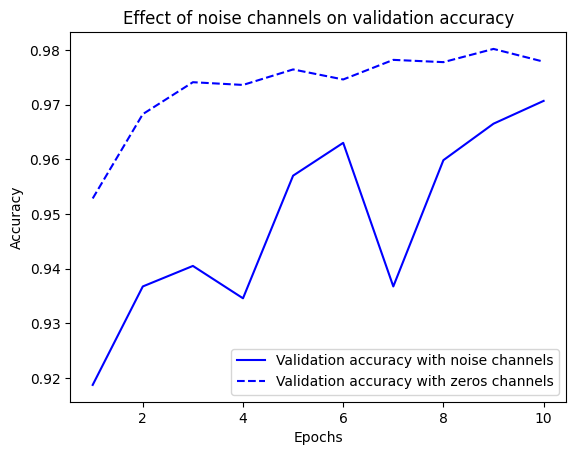

In [4]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 딥러닝에서 일반화의 본질

**랜덤하게 섞은 레이블로 MNIST 모델 훈련하기**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 2.3154 - accuracy: 0.1016 - val_loss: 2.3048 - val_accuracy: 0.1088
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2995 - accuracy: 0.1166 - val_loss: 2.3112 - val_accuracy: 0.0998
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2912 - accuracy: 0.1279 - val_loss: 2.3193 - val_accuracy: 0.0982
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2791 - accuracy: 0.1398 - val_loss: 2.3315 - val_accuracy: 0.1011
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2632 - accuracy: 0.1520 - val_loss: 2.3361 - val_accuracy: 0.1000
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2440 - accuracy: 0.1657 - val_loss: 2.3503 - val_accuracy: 0.1002
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2207 - accuracy: 0.1827 - val_loss: 2.3660 - val_accuracy: 0.0957

#### 매니폴드 가설

#### 일반화의 원천인 보간

#### 딥러닝이 작동하는 이유

#### 가장 중요한 훈련 데이터

## 머신 러닝 모델 평가

### 훈련, 검증, 테스트 세트

#### 단순 홀드아웃 검증

#### K-겹 교차 검증

#### 셔플링을 사용한 반복 K-겹 교차 검증

### 상식 수준의 기준점을 넘기

### 모델 평가에 대해 유념해야 할 점

## 훈련 성능 향상하기

### 경사 하강법의 핵심 파라미터 튜닝하기

**잘못된 높은 학습률로 MNIST 모델 훈련하기**

In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 877.6856 - accuracy: 0.3745 - val_loss: 4.7881 - val_accuracy: 0.2662
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 3.5218 - accuracy: 0.2073 - val_loss: 2.3736 - val_accuracy: 0.2043
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 2.5283 - accuracy: 0.2022 - val_loss: 2.3456 - val_accuracy: 0.1402
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3605 - accuracy: 0.1715 - val_loss: 2.4318 - val_accuracy: 0.2120
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 2.5888 - accuracy: 0.1901 - val_loss: 2.2758 - val_accuracy: 0.1733
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 2.4759 - accuracy: 0.2048 - val_loss: 2.2134 - val_accuracy: 0.2021
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 2.4409 - accuracy: 0.2014 - val_loss: 2.0852 - val_accuracy: 0.2247
Epoc

**같은 모델을 적절한 학습률로 훈련하기**

In [7]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.3534 - accuracy: 0.9112 - val_loss: 0.1582 - val_accuracy: 0.9540
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1275 - accuracy: 0.9639 - val_loss: 0.1353 - val_accuracy: 0.9655
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0977 - accuracy: 0.9740 - val_loss: 0.1494 - val_accuracy: 0.9675
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0812 - accuracy: 0.9795 - val_loss: 0.1550 - val_accuracy: 0.9692
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0701 - accuracy: 0.9823 - val_loss: 0.1769 - val_accuracy: 0.9657
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0597 - accuracy: 0.9854 - val_loss: 0.1879 - val_accuracy: 0.9702
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0528 - accuracy: 0.9869 - val_loss: 0.1763 - val_accuracy: 0.9739
Epoch 

### 구조에 대해 더 나은 가정하기

### 모델 용량 늘리기

**MNIST 데이터를 사용한 간단한 로지스틱 회귀 모델**

In [8]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.6686 - accuracy: 0.8350 - val_loss: 0.3601 - val_accuracy: 0.9003
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3527 - accuracy: 0.9031 - val_loss: 0.3105 - val_accuracy: 0.9163
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3176 - accuracy: 0.9119 - val_loss: 0.2944 - val_accuracy: 0.9172
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3020 - accuracy: 0.9159 - val_loss: 0.2844 - val_accuracy: 0.9237
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2921 - accuracy: 0.9186 - val_loss: 0.2789 - val_accuracy: 0.9250
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2856 - accuracy: 0.9196 - val_loss: 0.2746 - val_accuracy: 0.9252
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2807 - accuracy: 0.9215 - val_loss: 0.2713 - val_accuracy: 0.9255
Epoch 

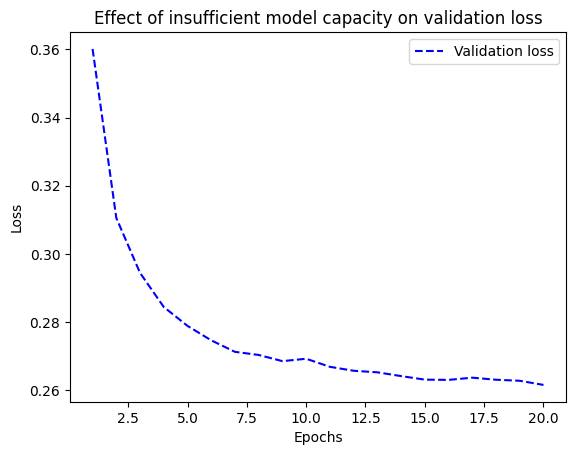

In [9]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [10]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.3697 - accuracy: 0.8942 - val_loss: 0.1958 - val_accuracy: 0.9434
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1647 - accuracy: 0.9502 - val_loss: 0.1392 - val_accuracy: 0.9589
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1162 - accuracy: 0.9649 - val_loss: 0.1287 - val_accuracy: 0.9628
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0886 - accuracy: 0.9736 - val_loss: 0.1122 - val_accuracy: 0.9668
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0712 - accuracy: 0.9782 - val_loss: 0.1073 - val_accuracy: 0.9695
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0593 - accuracy: 0.9823 - val_loss: 0.0980 - val_accuracy: 0.9718
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0493 - accuracy: 0.9852 - val_loss: 0.0956 - val_accuracy: 0.9732
Epoch 

## 일반화 성능 향상하기

### 데이터셋 큐레이션

### 특성 공학

### 조기 종료 사용하기

### 모델 규제하기

#### 네트워크 크기 축소

**원본 모델**

In [11]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 26ms/step - loss: 0.5246 - accuracy: 0.7737 - val_loss: 0.3914 - val_accuracy: 0.8677
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3223 - accuracy: 0.8942 - val_loss: 0.3077 - val_accuracy: 0.8854
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2366 - accuracy: 0.9213 - val_loss: 0.2790 - val_accuracy: 0.8914
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1911 - accuracy: 0.9371 - val_loss: 0.2752 - val_accuracy: 0.8910
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1603 - accuracy: 0.9473 - val_loss: 0.2871 - val_accuracy: 0.8840
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1351 - accuracy: 0.9549 - val_loss: 0.2877 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1153 - accuracy: 0.9641 - val_loss: 0.3017 - val_accuracy: 0.8838
Epoch 8/20
30

**작은 용량의 모델**

In [12]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 25ms/step - loss: 0.6253 - accuracy: 0.6363 - val_loss: 0.5789 - val_accuracy: 0.7716
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.5439 - accuracy: 0.7787 - val_loss: 0.5391 - val_accuracy: 0.7268
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4996 - accuracy: 0.8309 - val_loss: 0.5051 - val_accuracy: 0.8029
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4664 - accuracy: 0.8703 - val_loss: 0.4828 - val_accuracy: 0.8508
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4393 - accuracy: 0.8940 - val_loss: 0.4824 - val_accuracy: 0.8094
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4167 - accuracy: 0.9094 - val_loss: 0.4596 - val_accuracy: 0.8480
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3968 - accuracy: 0.9262 - val_loss: 0.4480 - val_accuracy: 0.8648
Epoch 8/20
30

**큰 용량의 모델**

In [13]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 25ms/step - loss: 0.5694 - accuracy: 0.7000 - val_loss: 0.3348 - val_accuracy: 0.8684
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3331 - accuracy: 0.8656 - val_loss: 0.2790 - val_accuracy: 0.8870
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2379 - accuracy: 0.9049 - val_loss: 0.2934 - val_accuracy: 0.8781
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1859 - accuracy: 0.9291 - val_loss: 0.3354 - val_accuracy: 0.8728
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1451 - accuracy: 0.9461 - val_loss: 0.2930 - val_accuracy: 0.8886
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1064 - accuracy: 0.9627 - val_loss: 0.3120 - val_accuracy: 0.8797
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0730 - accuracy: 0.9761 - val_loss: 0.4043 - val_accuracy: 0.8772
Epoch 8/20
30

#### 가중치 규제 추가하기

**모델에 L2 가중치 추가하기**

In [14]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 26ms/step - loss: 0.6242 - accuracy: 0.7739 - val_loss: 0.4918 - val_accuracy: 0.8663
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4260 - accuracy: 0.8869 - val_loss: 0.4072 - val_accuracy: 0.8818
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3487 - accuracy: 0.9078 - val_loss: 0.4188 - val_accuracy: 0.8569
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3096 - accuracy: 0.9227 - val_loss: 0.3719 - val_accuracy: 0.8797
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2862 - accuracy: 0.9299 - val_loss: 0.3562 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2685 - accuracy: 0.9357 - val_loss: 0.3574 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2551 - accuracy: 0.9427 - val_loss: 0.3591 - val_accuracy: 0.8833
Epoch 8/20
30

**케라스에서 사용할 수 있는 가중치 규제**

In [15]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### 드롭아웃 추가

**IMDB 모델에 드롭아웃 추가하기**

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 26ms/step - loss: 0.6596 - accuracy: 0.6037 - val_loss: 0.5792 - val_accuracy: 0.8326
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.5570 - accuracy: 0.7374 - val_loss: 0.4625 - val_accuracy: 0.8619
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4767 - accuracy: 0.7977 - val_loss: 0.3952 - val_accuracy: 0.8828
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4143 - accuracy: 0.8350 - val_loss: 0.3290 - val_accuracy: 0.8859
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3597 - accuracy: 0.8569 - val_loss: 0.2972 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3136 - accuracy: 0.8796 - val_loss: 0.2852 - val_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2784 - accuracy: 0.8921 - val_loss: 0.2872 - val_accuracy: 0.8886
Epoch 8/20
30

## 요약